In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df=pd.read_csv("ice_cream_selling_data.csv")

In [5]:
df.head()

,Temperature,Ice Cream Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [6]:
x=df[["Temperature"]]
y=df[["Ice Cream Sales"]]

In [7]:
x.shape

(49, 1)

In [8]:
y.shape

(49, 1)

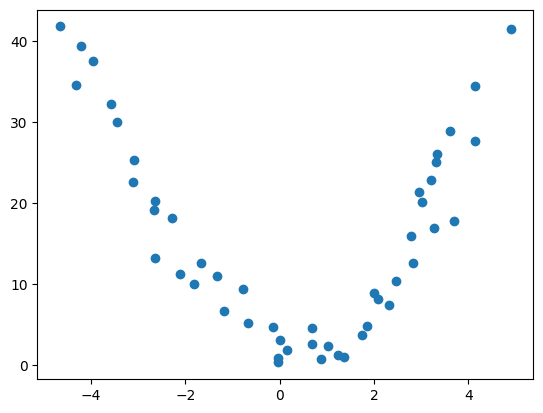

In [12]:
plt.scatter(x,y)
plt.show()

In [13]:
model=LinearRegression()

In [14]:
model.fit(x,y)

LinearRegression()

In [15]:
y_pred=model.predict(x)

In [34]:
y_pred[:2]

array([[19.83504165],
       [19.55970386]])

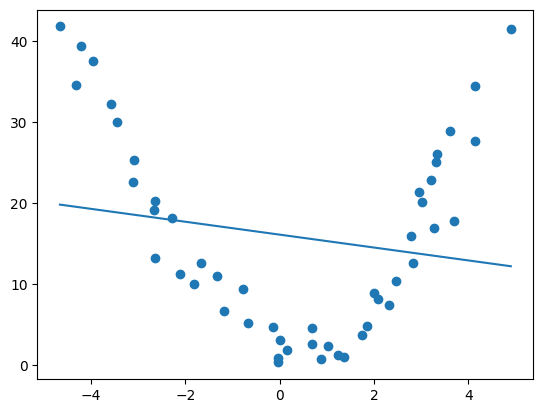

In [16]:
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.show()

In [18]:
print(model.coef_, model.intercept_)

[[-0.79645711]] [16.12174939]


In [20]:
poly_features = PolynomialFeatures(degree=2)
x_poly=poly_features.fit_transform(x)

In [21]:
x_poly.shape

(49, 3)

In [23]:
x_poly[:2]

array([[ 1.        , -4.66226268, 21.73669327],
       [ 1.        , -4.31655945, 18.63268546]])

In [24]:
x[:2]

,Temperature
0,-4.662263
1,-4.316559


In [26]:
model2=LinearRegression()
model2.fit(x_poly, y)

LinearRegression()

In [28]:
print(model2.coef_, model2.intercept_)

[[ 0.         -0.82468167  1.82952623]] [2.95177416]


In [32]:
y2_pred = model2.predict(x_poly)

In [33]:
y2_pred[:2]

array([[46.56450721],
       [40.60054839]])

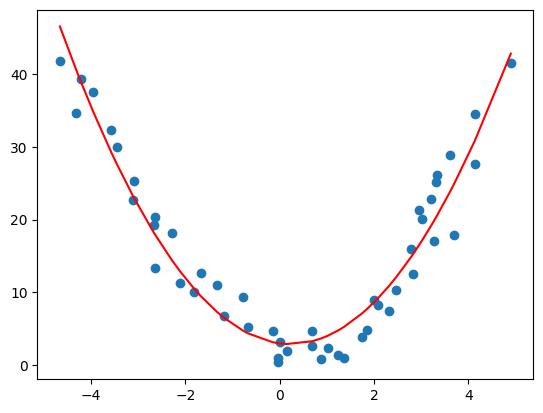

In [36]:
plt.scatter(x,y)
plt.plot(x,y2_pred, color="red")
plt.show()

In [43]:
df2=pd.concat([y], axis=1)
df2["Predicted"]=y2_pred
df2.head()

,Ice Cream Sales,Predicted
0,41.842986,46.564507
1,34.661120,40.600548
2,39.383001,38.915089
3,37.539845,34.749272
4,32.284531,29.331940


In [38]:
mse = mean_squared_error(y, y2_pred)
mae=mean_absolute_error(y, y2_pred)
r2=r2_score(y, y2_pred)

print("mse", mse)
print("mae", mae)
print("r2", r2)

mse 10.003220597194204
mae 2.697154847031322
r2 0.9321137090299405
